In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
%matplotlib inline
abs1 = pd.read_csv('A & B shingles-1.csv')


In [44]:
#abs1.head(5)
#abs1.info()
abs1.describe(include='all')
#abs1.columns
#dtypes1=abs1.dtypes
#print(dtypes1)

,A,B,diff
count,36.000000,36.000000,36.000000
mean,0.316667,0.267500,0.049167
std,0.135731,0.128026,0.218284
min,0.130000,0.100000,-0.380000
25%,0.207500,0.167500,-0.127500
50%,0.290000,0.230000,0.060000
75%,0.392500,0.375000,0.162500
max,0.720000,0.580000,0.620000


In [7]:
#Checking for null values if any
print("Is there any null values in B variable")
print(abs1['B'].isnull().any())

Is there any null values in B variable
True


In [13]:
# 3.1 For the A shingles, form the null and alternative hypothesis to test whether the population mean
# moisture content is less than 0.35 pound per 100 square feet.

#The t-test is used when the population mean is known and population standard deviation is unknown.
# M1 - population mean
#Hypothesis test:
#         H0: M1 = 0.35
#         H1: M1 < 0.35

stats.ttest_1samp(abs1.A, 0.35)

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.14955266289815025)

In [14]:
#T-test result returns -1.47 for t-statistic which implies mean is less than the population mean 
#and has approximately 15% probability of being part of the distribution with a pop_mean of 0.35.
#As the p-value is greater than 0.05, Null hypotheis is considered.

In [11]:
#For the B shingles, form the null and alternative hypothesis to test whether the population mean
#moisture content is less than 0.35 pound per 100 square feet.

##Checking for null values if any
print("Column B has any null value?\t\t{0}".format(abs1['B'].isnull().any()))

#Imputing missing values using median
medval=abs1['B'].median()
abs1['B']=abs1['B'].fillna(medval)

#The t-test is used when the population nean is known and population standard deviation is unknown.
#         H0: M1 = 0.35
#         H1: M2 < 0.35

#fillabs1 = abs1.fillna(0) #'B' has NaN values which are replaced with 0.0
stats.ttest_1samp(abs1.B, 0.35)

Column B has any null value?		True


Ttest_1sampResult(statistic=-3.866395342288255, pvalue=0.0004586648024154908)

In [104]:
#This returns -3.87 for t-statistic which implies mean is less than the population mean 
#and has approximately 0.01% probability of being part of the distribution with a pop_mean of 0.35.
#As the p-value is less than 0.05, Null hypotheis is rejected.



In [45]:
abs1.describe(include='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [45]:
#3.3. Do you think that the population means for shingles A and B are equal? 
#Form the hypothesis and conduct the test of the hypothesis.
#print(abs1['A'].size)
#since sample size is > 30, we can conduct paired sample Z test

#check for independence
#crosstab = pd.crosstab(abs1.A,abs1.B)
#print(crosstab)
#print("Chisquare test of independence - A and B")
#stats.chi2_contingency(crosstab)
#abs1['B'].skew()

#t, p_value  = stats.ttest_ind(abs1['A'], abs1['B'])
#print(t, p_value)

#ztest ,pval1 = stests.ztest(abs1['A'], x2=abs1['B'], value=0,alternative='two-sided')
#print("pvalue after z test is")
#print(pval1)

#stats.ttest_rel(abs1['A'], abs1['B'])

B     0.10  0.11  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.22  ...   0.31  \
A                                                                 ...          
0.13     0     1     0     0     0     0     0     0     0     0  ...      0   
0.14     0     0     1     0     0     0     0     0     0     0  ...      0   
0.15     0     0     0     0     0     0     0     0     0     0  ...      0   
0.16     0     0     0     0     0     0     0     0     0     0  ...      1   
0.20     0     0     0     0     0     0     0     0     0     0  ...      0   
0.21     0     0     0     0     0     0     0     0     0     0  ...      0   
0.22     0     0     0     0     0     0     0     0     0     0  ...      0   
0.24     0     0     0     0     0     0     0     1     0     0  ...      0   
0.25     0     1     0     0     0     0     0     0     0     0  ...      0   
0.26     0     0     0     0     0     0     1     0     0     0  ...      0   
0.27     0     0     0     0     0     0

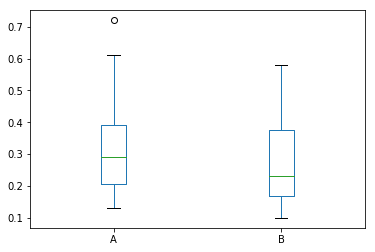

In [36]:
#checking for assumptions
#1. check outliers
abs1[['A', 'B']].plot(kind='box')


In [55]:
#abs1['A'].head(25)


In [43]:
#outlier means use wilcoxon
#abs1['diff']=abs1['A']-abs1['B']
#abs1['diff'].plot(kind="box")
#print(abs1['diff'][abs1['diff']==0])
#stats.wilcoxon(abs1['diff'])
print(stats.wilcoxon(abs1['diff']))

WilcoxonResult(statistic=243.0, pvalue=0.23825580330698926)


0.32508222576301116

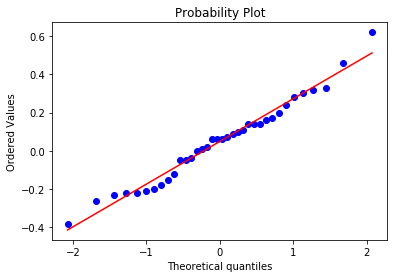

In [40]:
stats.probplot(abs1['diff'], plot= plt)
abs1['diff'].skew()

In [35]:
#print(stats.shapiro(abs1['diff']))
print("Test statistic and p value after normal test is")
stat, p = normaltest(abs1['diff'])
print(stat, p)

#result = anderson(abs1['diff'])
#print(result.statistic)
#print(result.critical_values)
#If some of the methods suggest that the sample is Gaussian and some not, 
#then perhaps take this as an indication that your data is Gaussian-like.


Test statistic and p value after normal test is
0.9268719234021279 0.629118301228768
